In [63]:
from os.path import split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [65]:
df = pd.read_csv('data/Filosofi2017_carreaux_200m_mart.csv', low_memory=False)
df.drop(['Idcar_200m', 'Idcar_1km', 'I_est_1km', 'Idcar_nat', 'lcog_geo'], axis=1, inplace=True)
# df = df.sample(frac=0.01, random_state=42)
df

,I_est_200,Groupe,Ind,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men
0,1,174380,1.0,0.2,0.1,0.2,0.0,19527.6,43.8,0.0,...,0.1,0.1,0.1,0.3,0.2,0.1,0.0,0.0,0.1,0.4
1,1,174380,6.0,1.4,0.4,1.2,0.0,117165.8,262.8,0.0,...,0.8,0.2,0.6,1.8,1.0,0.8,0.0,0.0,0.4,2.6
2,1,174380,5.0,1.2,0.3,1.0,0.0,97638.2,219.0,0.0,...,0.6,0.2,0.5,1.5,0.8,0.7,0.0,0.0,0.3,2.2
3,1,174380,1.0,0.2,0.1,0.2,0.0,19527.6,43.8,0.0,...,0.1,0.1,0.1,0.3,0.2,0.1,0.0,0.0,0.1,0.4
4,1,174380,3.0,0.7,0.2,0.6,0.0,58582.9,131.4,0.0,...,0.4,0.1,0.3,0.9,0.5,0.4,0.0,0.0,0.2,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127,0,1021172,112.0,23.0,3.0,30.0,7.0,1776588.8,3884.0,6.0,...,7.0,6.0,7.0,26.0,20.0,22.0,12.0,0.0,25.0,51.0
11128,0,1021179,164.0,30.0,8.0,38.0,19.0,2445240.5,4114.0,5.0,...,12.0,10.0,27.0,29.0,43.0,22.0,14.0,0.0,33.0,70.0
11129,0,1021177,80.0,8.0,5.0,9.0,5.0,1143874.9,1361.0,1.0,...,9.0,4.0,16.0,15.0,14.0,12.0,2.0,0.0,14.0,26.0
11130,1,1021167,3.0,0.6,0.1,0.6,0.3,48368.5,119.2,0.2,...,0.3,0.1,0.4,0.6,0.5,0.3,0.5,0.0,0.6,1.3


In [21]:
X = StandardScaler().fit_transform(df)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', alpha=0.6, edgecolors='k')
plt.title("Données originales (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")

In [52]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)

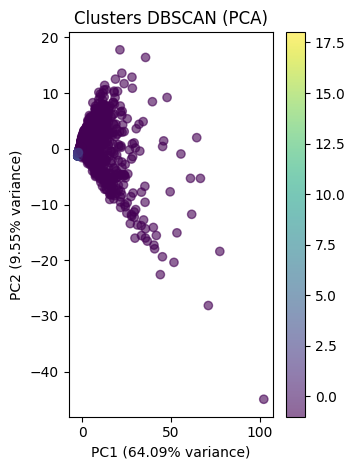

In [53]:
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title("Clusters DBSCAN (PCA)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.tight_layout()
plt.show()

In [54]:
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

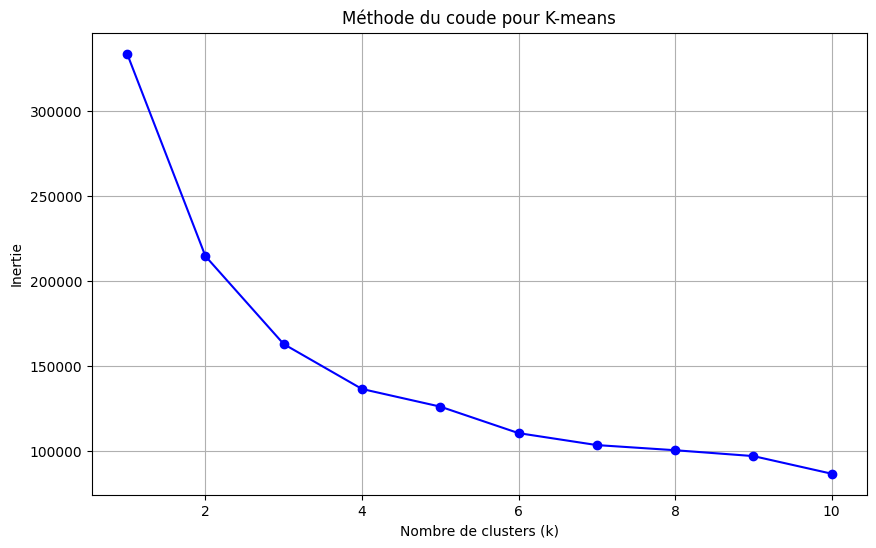

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.title('Méthode du coude pour K-means')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

In [56]:
optimal_k = 5

In [60]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

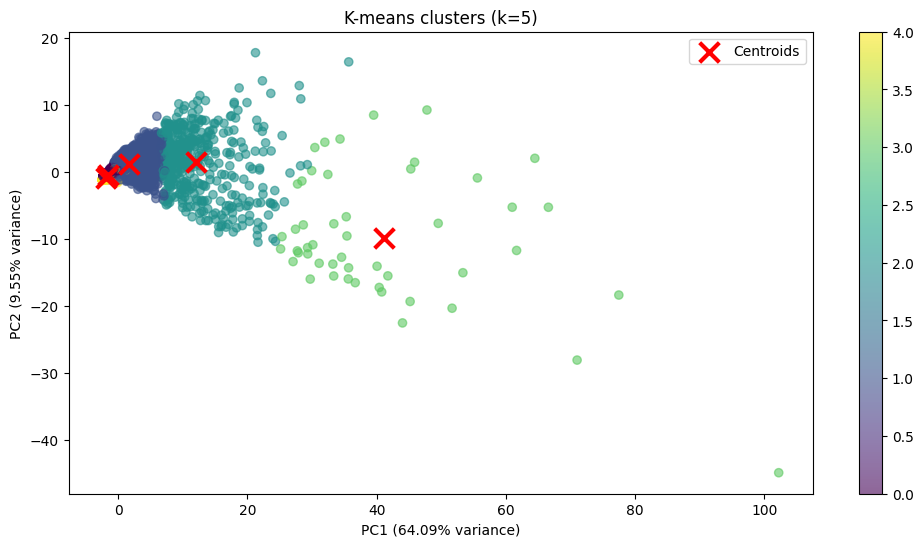

In [61]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.colorbar(scatter)
plt.title(f"K-means clusters (k={optimal_k})")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend()
plt.show()

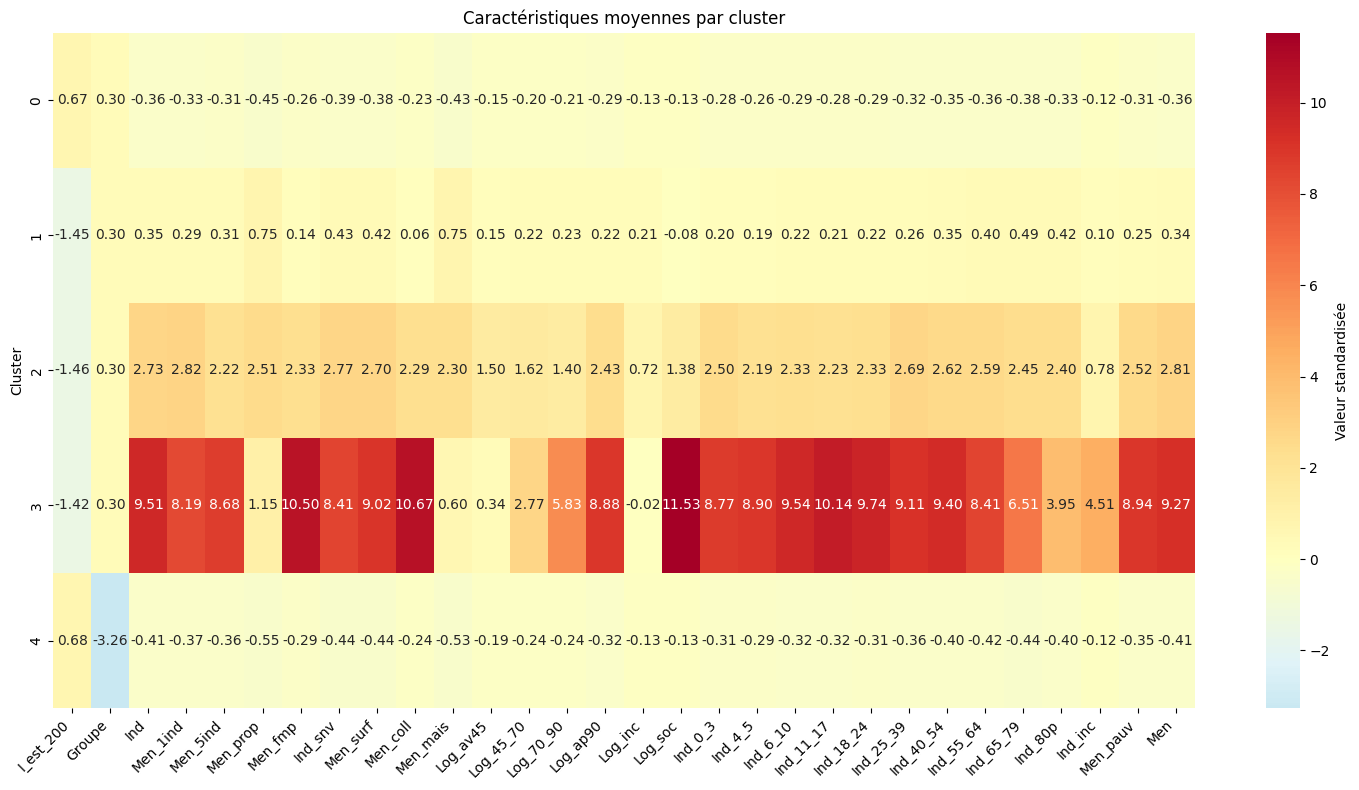

In [66]:
df_with_clusters = pd.DataFrame(X, columns=df.columns)
df_with_clusters['Cluster'] = kmeans_labels
cluster_means = df_with_clusters.groupby('Cluster').mean()

plt.figure(figsize=(15, 8))
sns.heatmap(cluster_means, cmap='RdYlBu_r', center=0, annot=True, fmt='.2f', 
            cbar_kws={'label': 'Valeur standardisée'})
plt.title('Caractéristiques moyennes par cluster')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
cluster_means

,I_est_200,Groupe,Ind,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.671966,0.297582,-0.358835,-0.334995,-0.307980,-0.448028,-0.259804,-0.387064,-0.382175,-0.230717,...,-0.281256,-0.288657,-0.319949,-0.352234,-0.364243,-0.378291,-0.331022,-0.116121,-0.306103,-0.358942
1,-1.446616,0.297065,0.347087,0.290482,0.310513,0.754689,0.136509,0.430259,0.418906,0.061351,...,0.214010,0.220196,0.257210,0.348186,0.401261,0.491109,0.423457,0.101179,0.252219,0.337322
2,-1.458285,0.297279,2.727447,2.817168,2.215089,2.507891,2.333697,2.771072,2.701526,2.292950,...,2.229813,2.326014,2.694195,2.623485,2.593526,2.454253,2.396513,0.776303,2.524705,2.813539
3,-1.419135,0.297136,9.511705,8.189484,8.681174,1.147611,10.496905,8.409773,9.023580,10.674808,...,10.139469,9.741062,9.107254,9.397097,8.409599,6.505525,3.954428,4.513085,8.937675,9.267921
4,0.683554,-3.262590,-0.408929,-0.370611,-0.356897,-0.545271,-0.290985,-0.440542,-0.436547,-0.244324,...,-0.318849,-0.312594,-0.357702,-0.402260,-0.421859,-0.443922,-0.399827,-0.119020,-0.347795,-0.406246


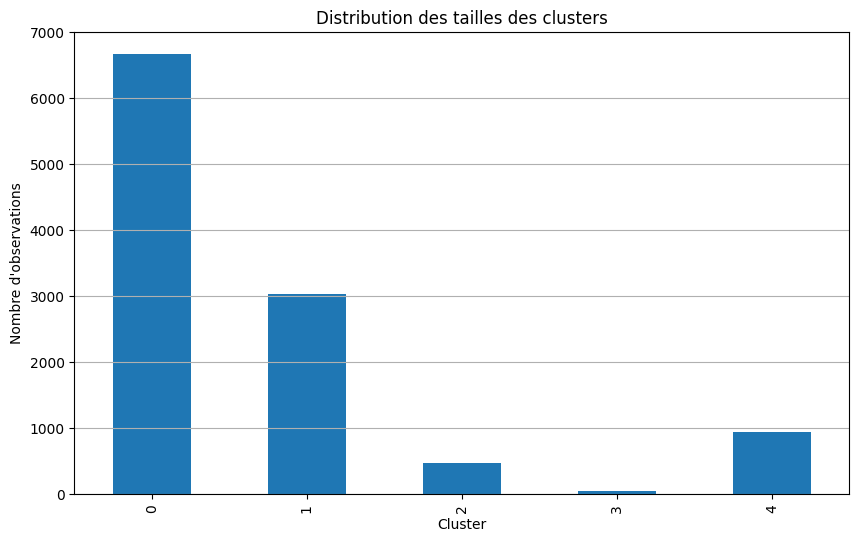

In [68]:
plt.figure(figsize=(10, 6))
cluster_sizes = pd.Series(kmeans_labels).value_counts().sort_index()
cluster_sizes.plot(kind='bar')
plt.title('Distribution des tailles des clusters')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.grid(True, axis='y')
plt.show()